# **Principal Component Analysis (PCA): Step by Step**

PCA, or Principal Component Analysis, is a dimensionality reduction technique commonly used in machine learning and statistics. Its primary purpose is to transform high-dimensional data into a lower-dimensional form while retaining as much of the original data's variance as possible. This is achieved by identifying the principal components, which are linear combinations of the original features that capture the most significant sources of variation in the data.

Here's a brief overview of the PCA process:

1. **Mean Centering:** The mean of each feature is subtracted from the data to center it around the origin.

2. **Covariance Matrix Calculation:** The covariance matrix of the mean-centered data is computed. This matrix describes the relationships between different features and their variances.

3. **Eigendecomposition:** The next step involves finding the eigenvectors and eigenvalues of the covariance matrix. Eigenvectors represent the directions of maximum variance, and eigenvalues indicate the magnitude of variance in those directions.

4. **Selection of Principal Components:** The eigenvectors are ranked by their corresponding eigenvalues, and the top k eigenvectors (where k is the desired lower dimensionality) are selected to form a new matrix, known as the transformation matrix.

5. **Projection:** The original data is then projected onto this lower-dimensional subspace using the transformation matrix, resulting in a new set of features called principal components.

PCA is widely used for various purposes, including data compression, noise reduction, visualization, and as a preprocessing step in machine learning tasks to enhance model performance by reducing the dimensionality of the input data.

## **Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

## **Make the Data for Classification**

In [2]:
# Create a data with 3 features
X, y = make_classification(
    n_samples=200,  # Total number of samples
    n_features=3,   # Number of features
    n_informative=2,  # Number of informative features
    n_redundant=0,    # Number of redundant features
    n_classes=2,      # Number of classes (binary classification)
    random_state=42   # Random seed for reproducibility
)

In [3]:
# Convert the data array into pandas dataframe
df = pd.DataFrame({"feature1": X[:, 0], "feature2": X[:, 1], "feature3": X[:, 2], "target": y})
print(df.shape)
df.head()

(200, 4)


,feature1,feature2,feature3,target
0,-1.478586,1.544010,0.789800,1
1,0.711615,-1.325960,-0.961946,0
2,0.384065,-0.918273,-0.753642,0
3,-0.510016,1.087571,1.449809,1
4,1.006293,0.484545,1.186697,0


## **Plot the Data**

In [4]:
# Plot a 3D scatter plot
fig = px.scatter_3d(df, x=df["feature1"], y=df["feature2"], z=df["feature3"],
                    color=df["target"].astype("str"), width=600, height=600)
fig.update_traces(marker=dict(size=4, line=dict(width=2, color="DarkSlateGrey")),
                  selector=dict(mode="markers"))
fig.show()

## **Step-1: Mean Centering**

In [5]:
# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit and transform input features
X_scaled = scaler.fit_transform(df.iloc[:, :-1])

# Convert the scaled array into pandas dataframe
X_scaled = pd.DataFrame(X_scaled, columns=df.columns[:-1])
X_scaled.head()

,feature1,feature2,feature3
0,-1.389590,1.194014,0.523790
1,0.759917,-1.013612,-0.760729
2,0.438454,-0.700012,-0.607984
3,-0.439016,0.842914,1.007760
4,1.049120,0.379057,0.814826


In [6]:
X_scaled.describe().round(2)

,feature1,feature2,feature3
count,200.00,200.00,200.00
mean,0.00,-0.00,-0.00
std,1.00,1.00,1.00
min,-2.36,-2.58,-2.32
25%,-0.73,-0.72,-0.77
50%,-0.00,0.02,0.15
75%,0.68,0.80,0.66
max,3.08,2.25,2.86


## **Step-2: Covariance Matrix Calculation**

In [7]:
covariance_matrix = X_scaled.cov()
print("Covariance Matrix:")
covariance_matrix

Covariance Matrix:


,feature1,feature2,feature3
feature1,1.005025,0.057688,-0.050758
feature2,0.057688,1.005025,0.089511
feature3,-0.050758,0.089511,1.005025


## **Step-3: Eigendecomposition**

In [8]:
# Calculate the Eigen Vectors and Eigen Values of the Variance-Covariance matrix
eigen_values, eigen_vectors = np.linalg.eig(np.array(covariance_matrix))

In [9]:
eigen_values

array([0.87145497, 1.04866409, 1.09495632])

In [10]:
eigen_vectors

array([[-0.49815677,  0.8628754 ,  0.08535732],
       [ 0.62081198,  0.28621043,  0.72984661],
       [-0.60533654, -0.41656888,  0.67826105]])

## **Step-4: Selection of Principal Components**

In [11]:
# Plot the eigen vectors in 3D space
# Create a 3D scatter plot
i = 1

fig = go.Figure()

for eig_vector in eigen_vectors:
    eig_vector = np.hstack((np.array([0, 0, 0]), eig_vector))
    fig.add_trace(go.Scatter3d(
        x=[eig_vector[0], eig_vector[3]],
        y=[eig_vector[1], eig_vector[4]],
        z=[eig_vector[2], eig_vector[5]],
        mode='lines+markers',
        marker=dict(size=6),
        line=dict(width=4),
        name='Eigen Vector ' + str(i)
    ))

    i+=1

fig.add_trace(go.Scatter3d(
    x=X_scaled.iloc[:, 0],
    y=X_scaled.iloc[:, 1],
    z=X_scaled.iloc[:, 2],
    mode='markers',
    marker=dict(size=3, color=df["target"], colorscale='RdYlGn',
                opacity=0.4, line=dict(width=1, color="black")),
    name='Scatter Points'
))

# Set axis labels
fig.update_layout(scene=dict(xaxis_title='feature1', yaxis_title='feature2', zaxis_title='feature3'), width=800, height=600)

# Show the interactive plot
fig.show()

In [12]:
# Get the sorted indices that would sort eigen values in descending order
sorted_indices = np.argsort(eigen_values)[::-1]
sorted_indices

array([2, 1, 0])

In [13]:
# Select top two principal components
pc = eigen_vectors[sorted_indices[:2]]
pc

array([[-0.60533654, -0.41656888,  0.67826105],
       [ 0.62081198,  0.28621043,  0.72984661]])

## **Step-5: Projection**

In [14]:
# Project the scaled data onto principal components
transformed_df = np.dot(X_scaled, pc.T)
new_df = pd.DataFrame(transformed_df, columns=["PC1", "PC2"])

# Add the 'target' column
new_df["target"] = df["target"].values
new_df.head()

,PC1,PC2,target
0,0.699047,-0.138649,1
1,-0.553740,-0.373556,0
2,-0.386181,-0.371889,0
3,0.598145,0.704215,1
4,-0.240310,1.354494,0


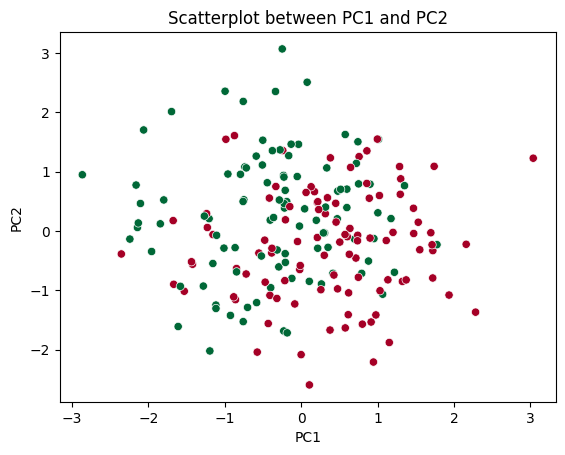

In [15]:
sns.scatterplot(x=new_df["PC1"], y=new_df["PC2"], c=new_df["target"], cmap="RdYlGn")
plt.title("Scatterplot between PC1 and PC2")
plt.show()